In [51]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures

In [6]:
pwd

'C:\\Ravikanth\\Kaggle\\home-credit-default-risk'

In [5]:
path = "C:\\Ravikanth\\Kaggle\\home-credit-default-risk"
os.chdir(path)

In [8]:
print(os.listdir())

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [9]:
app_train = pd.read_csv('application_train.csv')
print(app_train.shape)

(307511, 122)


In [10]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
app_test = pd.read_csv('application_test.csv')
print(app_test.shape)
app_test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

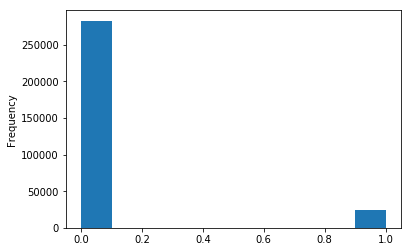

In [14]:
app_train['TARGET'].astype(int).plot.hist()

In [30]:
def missing_val_table(df):
    miss_val = df.isnull().sum()
    miss_val_percent = 100*miss_val/len(df)
    miss_val_table = pd.concat([miss_val , miss_val_percent] , axis = 1 )
    miss_val_table_ren =  miss_val_table.rename(columns={ 0: 'Missing Values' , 1: 'Missing Value %'})
    miss_val_table_ren = miss_val_table_ren[miss_val_table_ren.iloc[:,1] != 0].sort_values('Missing Value %' , ascending = False).round(1)
    print("Your Selected dataframe has " + str(df.shape[1]) + " columns \n " 
          "There are " + str(miss_val_table_ren.shape[0]) + " columns that has missing values" )
    return miss_val_table_ren
    
    
    

In [31]:
missing_val_table(app_train)

Your Selected dataframe has 122 columns 
 There are 67 columns that has missing values


,Missing Values,Missing Value %
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [32]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [35]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [38]:
#Label encoding for categorical columns which have less thanor equal to 2 categories
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            le_count += 1
            
print( "%d columns were Label encoded" % le_count)

3 columns were Label encoded


In [41]:
#one hot encoding for categorical columns which have more that 2 categories
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features Shape:' , app_train.shape)
print('Training Features Shape:' , app_test.shape)

Shape of Train data after OHE: (307511, 243)
Shape of Test data after OHE: (48744, 239)


In [42]:
# One-hot encoding has created more columns in the training data because 
#there were some categorical variables with categories not represented in the testing data
#we need to align the dataframes.

labels_train = app_train['TARGET']

app_train , app_test = app_train.align(app_test, join='inner', axis=1)

app_train['TARGET'] = labels_train
print('Training Features Shape:' , app_train.shape)
print('Training Features Shape:' , app_test.shape)

Training Features Shape: (307511, 240)
Training Features Shape: (48744, 239)


In [44]:
correlations = app_train.corr()['TARGET'].sort_values()

In [47]:
correlations.head()

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
Name: TARGET, dtype: float64

In [48]:
correlations.tail()

NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

In [49]:
poly_feautures = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_feautures_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [52]:
poly_target = poly_feautures['TARGET']
poly_feautures = poly_feautures.drop(columns= ['TARGET'])

In [53]:
impute = Imputer(strategy='median')

In [54]:
poly_feautures = impute.fit_transform(poly_feautures)
poly_feautures_test = impute.fit_transform(poly_feautures_test)

In [55]:
poly_transform = PolynomialFeatures(degree=3)

In [56]:
poly_transform.fit(poly_feautures)
poly_feautures = poly_transform.transform(poly_feautures)
poly_feautures_test = poly_transform.transform(poly_feautures_test)

In [58]:
poly_transform.get_feature_names(input_features= ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [59]:
poly_feautures.shape

(307511, 35)

In [60]:
poly_feautures_test.shape

(48744, 35)

In [61]:
poly_feautures_df = pd.DataFrame(poly_feautures , columns=poly_transform.get_feature_names(input_features= ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [62]:
poly_feautures_df['TARGET'] = poly_target

In [64]:
poly_corrs = poly_feautures_df.corr()['TARGET'].sort_values()

In [65]:
poly_corrs

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
EXT_SOURCE_2^2                           -0.149512
EXT_SOURCE_3^2                           -0.141662
EXT_SOURCE_2^3                           -0.140243
EXT_SOURCE_1^2 EXT_SOURCE_2              -0.140185
EXT_SOURCE_1^2 EXT_SOURCE_3              -0.138846
EXT_SOURCE_2 DAYS_BIRTH^2                -0.132839
EXT_SOURCE_3^3                           -0.128213
EXT_SOURCE_3 DAYS_BIRTH^2                -0.126950
EXT_SOURCE_1                             -0.098887
EXT_SOURCE_1 DAYS_BIRTH^2      

In [66]:
poly_feautures_test_df = pd.DataFrame(poly_feautures_test , columns=poly_transform.get_feature_names(input_features= ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [69]:
#Merge Poly feautures with the app_train

poly_feautures_df['SK_ID_CURR'] = app_train['SK_ID_CURR']
poly_feautures_test_df['SK_ID_CURR'] = app_test['SK_ID_CURR']

In [70]:
app_train_poly = app_train.merge(poly_feautures_df , how='left', on='SK_ID_CURR')
app_test_poly = app_test.merge(poly_feautures_test_df , how='left', on='SK_ID_CURR')

In [72]:
app_train_poly.shape

(307511, 276)

In [73]:
app_test_poly.shape

(48744, 274)

In [74]:
app_train_poly , app_test_poly = app_train_poly.align(app_test_poly , join='inner', axis=1)

In [75]:
app_train_poly.shape

(307511, 274)

In [76]:
app_test_poly.shape

(48744, 274)

In [77]:
# Now we will work on Bureau Data. So far we were working on app_data

bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [78]:
bureau.shape

(1716428, 17)

In [79]:
missing_val_table(bureau)

Your Selected dataframe has 17 columns 
 There are 7 columns that has missing values


,Missing Values,Missing Value %
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


In [90]:
previous_loan_count = bureau.groupby(by=['SK_ID_CURR'], as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU' :'previous_loan_count' })

In [92]:
previous_loan_count.head()

,SK_ID_CURR,previous_loan_count
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [108]:
app_train_poly = app_test_poly.merge(previous_loan_count , on = 'SK_ID_CURR' , how= 'left')

In [109]:
app_train_poly['previous_loan_count'] = app_train_poly['previous_loan_count'].fillna(0)

In [110]:
app_train_poly['TARGET'] =poly_target

In [111]:
app_train_poly.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET,previous_loan_count
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,-11997.802403,0.020094,-2423.698322,2.923427e+08,0.004059,-489.615795,5.905670e+07,-7.123328e+12,1,7.0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,-1536.577117,0.054673,-2281.043619,9.516956e+07,0.081161,-3386.201665,1.412789e+08,-5.894429e+12,0,3.0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,-9812.640816,0.261238,-8567.521115,2.809794e+08,0.228089,-7480.393855,2.453261e+08,-8.045687e+12,0,4.0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,-3630.555667,0.191336,-4364.443591,9.955450e+07,0.230013,-5246.681115,1.196786e+08,-2.729912e+12,0,12.0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,-2362.974127,0.114707,-2881.489762,7.238455e+07,0.139877,-3513.785087,8.826814e+07,-2.217342e+12,0,0.0


In [114]:
app_test_poly = app_test_poly.drop(columns=['TARGET'])

In [115]:
app_test_poly.shape

(48744, 274)

In [118]:
corr_pre_count = app_train_poly['TARGET'].corr(app_train_poly['previous_loan_count'])

In [119]:
corr_pre_count

-0.00145970229076599

In [123]:
#we compute statistics for all the numeric columns by using agg function

bureau_agg = bureau.drop(columns= ['SK_ID_BUREAU']).groupby('SK_ID_CURR' , as_index = False).agg(['count', 'max','min','mean','sum'] ).reset_index()

In [124]:
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE      \
                   count  max   min         mean   sum              count max   
0     100001           7  -49 -1572  -735.000000 -5145                  7   0   
1     100002           8 -103 -1437  -874.000000 -6992                  8   0   
2     100003           4 -606 -2586 -1400.750000 -5603                  4   0   
3     100004           2 -408 -1326  -867.000000 -1734                  2   0   
4     100005           3  -62  -373  -190.666667  -572                  3   0   

             ...    DAYS_CREDIT_UPDATE                               \
  min mean   ...                 count  max   min        mean   sum   
0   0  0.0   ...                     7   -6  -155  -93.142857  -652   
1   0  0.0   ...                     8   -7 -1185 -499.875000 -3999   
2   0  0.0   ...                     4  -43 -2131 -816.000000 -3264   
3   0  0.0   ...                     2 -382  -682 -532.000000 -1064   
4   0  0.0   ...                     3  -11  -121  -54.333333  -163   

  AMT_ANNUITY                                      
        count      max  min         mean      sum  
0           7  10822.5  0.0  3545.357143  24817.5  
1           7      0.0  0.0     0.000000      0.0  
2           0      NaN  NaN          NaN      0.0  
3           0      NaN  NaN          NaN      0.0  
4           3   4261.5  0.0  1420.500000   4261.5  

[5 rows x 61 columns]

In [139]:
#the dataframe has a multi-level index. we need to create new names for each of these columns
bureau_agg.columns.levels[1][:-1]

Index(['count', 'max', 'min', 'mean', 'sum'], dtype='object')

In [146]:
columns = ['SK_ID_CURR']

for var in bureau_agg.columns.levels[0]:
    if var != 'SK_ID_CURR':
        for stat in bureau_agg.columns.levels[1][:-1]:
            columns.append('bureau_%s_%s' % (var,stat))
            
            
            
        

In [148]:
bureau_agg.columns = columns
bureau_agg.head()


,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_mean,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_sum
0,100001,7,-49,-1572,-735.000000,-5145,7,0,0,0.0,...,7,-6,-155,-93.142857,-652,7,10822.5,0.0,3545.357143,24817.5
1,100002,8,-103,-1437,-874.000000,-6992,8,0,0,0.0,...,8,-7,-1185,-499.875000,-3999,7,0.0,0.0,0.000000,0.0
2,100003,4,-606,-2586,-1400.750000,-5603,4,0,0,0.0,...,4,-43,-2131,-816.000000,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-408,-1326,-867.000000,-1734,2,0,0,0.0,...,2,-382,-682,-532.000000,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-62,-373,-190.666667,-572,3,0,0,0.0,...,3,-11,-121,-54.333333,-163,3,4261.5,0.0,1420.500000,4261.5


In [149]:
#merge with the train data
app_train_poly.shape

(48744, 276)

In [150]:
app_train_poly = app_train_poly.merge(bureau_agg , on= 'SK_ID_CURR' , how = 'left')

In [151]:
app_train_poly.shape

(48744, 336)

In [153]:
#Correlations of Aggregated Values with Target

new_corr = []

for col in columns:
    corr = app_train_poly['TARGET'].corr(app_train_poly[col])
    new_corr.append((col,corr))



In [155]:
# Sort the correlations by the absolute value
new_corr = sorted(new_corr , key= lambda x : abs(x[1]) , reverse= True)

In [157]:
new_corr[:15]

[('bureau_AMT_CREDIT_SUM_max', 0.017205567065298872),
 ('bureau_AMT_ANNUITY_max', 0.01673226628601451),
 ('bureau_AMT_CREDIT_SUM_sum', 0.015661041361673754),
 ('bureau_AMT_ANNUITY_sum', 0.015577136915020297),
 ('bureau_AMT_CREDIT_SUM_mean', 0.012608768039547932),
 ('bureau_AMT_CREDIT_SUM_DEBT_min', 0.012448666990225944),
 ('bureau_AMT_CREDIT_SUM_DEBT_mean', 0.012156081075019776),
 ('bureau_AMT_CREDIT_MAX_OVERDUE_count', -0.009127703251479515),
 ('bureau_AMT_ANNUITY_mean', 0.009034060312798948),
 ('bureau_CREDIT_DAY_OVERDUE_min', 0.008816746325549844),
 ('bureau_AMT_CREDIT_SUM_DEBT_sum', 0.0077101645132552354),
 ('bureau_AMT_CREDIT_SUM_DEBT_max', 0.007444606828942218),
 ('bureau_DAYS_CREDIT_UPDATE_max', -0.007362125441736136),
 ('bureau_AMT_CREDIT_SUM_min', 0.007222902814799528),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.006424767814606784)]

In [158]:
#Now we move from the numeric columns to the categorical columns. 

In [160]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354


In [161]:
categorical_agg = categorical.groupby('SK_ID_CURR' , as_index = False).agg(['sum', 'mean']).reset_index()

In [162]:
categorical_agg.head()

SK_ID_CURR CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                              sum      mean                    sum mean   
0     100001                    3  0.428571                      0  0.0   
1     100002                    2  0.250000                      0  0.0   
2     100003                    1  0.250000                      0  0.0   
3     100004                    0  0.000000                      0  0.0   
4     100005                    2  0.666667                      0  0.0   

  CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                   sum      mean                sum mean   
0                    4  0.571429                  0  0.0   
1                    6  0.750000                  0  0.0   
2                    3  0.750000                  0  0.0   
3                    2  1.000000                  0  0.0   
4                    1  0.333333                  0  0.0   

  CREDIT_CURRENCY_currency 1 ...  CREDIT_TYPE_Microloan       \
                         sum ...                    sum mean   
0                          7 ...                      0  0.0   
1                          8 ...                      0  0.0   
2                          4 ...                      0  0.0   
3                          2 ...                      0  0.0   
4                          3 ...                      0  0.0   

  CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                               sum mean                  sum mean   
0                                0  0.0                    0  0.0   
1                                0  0.0                    0  0.0   
2                                0  0.0                    0  0.0   
3                                0  0.0                    0  0.0   
4                                0  0.0                    0  0.0   

  CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan       
                           sum mean                              sum mean  
0                            0  0.0                                0  0.0  
1                            0  0.0                                0  0.0  
2                            0  0.0                                0  0.0  
3                            0  0.0                                0  0.0  
4                            0  0.0                                0  0.0  

[5 rows x 47 columns]

In [168]:
cat_columns = ['SK_ID_CURR']

for cat_var in categorical_agg.columns.levels[0]:
    if cat_var != 'SK_ID_CURR':
        for cat_stat in categorical_agg.columns.levels[1][:-1]:
            cat_columns.append('bureau_%s_%s' % (cat_var,cat_stat))
            

In [169]:
categorical_agg.columns = cat_columns

In [171]:
app_train_poly = app_train_poly.merge(categorical_agg , on= 'SK_ID_CURR' , how= 'left')

In [172]:
app_train_poly.shape

(48744, 382)

In [173]:
"""To recap, for the bureau dataframe we:

1.Calculated numeric stats grouping by each loan
2.Made value counts of each categorical variable grouping by loan
3.Merged the stats and the value counts on the loans
4.Calculated numeric stats for the resulting dataframe grouping by the client id"""

'To recap, for the bureau dataframe we:\n\n1.Calculated numeric stats grouping by each loan\n2.Made value counts of each categorical variable grouping by loan\n3.Merged the stats and the value counts on the loans\n4.Calculated numeric stats for the resulting dataframe grouping by the client id'

In [174]:
# the above process should also be applied to test dataframe so that both the dataframe have same column names

In [176]:
app_test_poly.shape

(48744, 274)

In [177]:
app_test_poly = app_test_poly.merge(bureau_agg , on= 'SK_ID_CURR' , how = 'left')
app_test_poly = app_test_poly.merge(categorical_agg , on= 'SK_ID_CURR' , how= 'left')

In [178]:
app_test_poly.shape

(48744, 380)

In [179]:
#Now we have to align Test and Train data , expect for the Target columns

label = app_train_poly['TARGET']

app_train_poly , app_test_poly = app_train_poly.align(app_test_poly , join='inner', axis=1)

app_train_poly['TARGET'] = label


In [180]:
print(app_train_poly.shape)
print(app_test_poly.shape)

(48744, 381)
(48744, 380)
